In [43]:
import clip
import torch
from PIL import Image
import numpy as np
import pandas as pd
from pathlib import Path
import glob

In [4]:
# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [5]:
features_path = Path("features")

In [18]:
features = np.load("features/features.npy")
features_list = [feature for feature in features]
df = pd.read_csv('dataset.csv')

In [19]:
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [84]:
from PIL import Image
img = Image.open(r"C:\Users\moham\Downloads\téléchargement.png")
photo_preprocessed = preprocess(img).unsqueeze(0).to(device)


with torch.no_grad():
    # Encode the photos batch to compute the feature vectors and normalize them
    photo_features = model.encode_image(photo_preprocessed)
    photo_features /= photo_features.norm(dim=-1, keepdim=True)

max = 0, cosine_similarity(features_list[0], photo_features.numpy()[0])
print(max)
for i, feature in enumerate(features_list):
    if cosine_similarity(feature, photo_features.numpy()[0]) > max[1]:
        max = i, cosine_similarity(feature, photo_features.numpy()[0])


(0, 0.6781637)


In [85]:
print(max)

(188, 0.88278604)


In [86]:
df.iloc[max[0]]['description']

'Mango Dragonfruit Refresher'

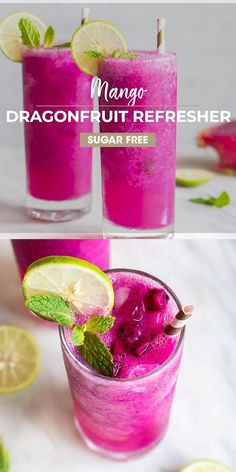

In [87]:
from IPython.display import Image
Image(filename=Path('images')/df.iloc[max[0]]['id']) 